# Принятие решений в бизнесе.  

***Задача - проанализировать гипотезы подготовленные для увеличения выручки крупного интернет-магазина***

Вместе с отделом маркетинга был подготовен список гипотез для увеличения выручки.
Необходимо приоритизироваьт гипотезы, запустить A/B-тест и проанализировать результаты.

In [1]:
import pandas as pd
import os
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
if os.path.exists('/datasets/hypothesis.csv'):
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
else:
    hypothesis = pd.read_csv('C:/Users/user/Documents/Проекты ЯП/Принятие решений в бизнесе/Исходные данные/hypothesis.csv')
    orders = pd.read_csv('C:/Users/user/Documents/Проекты ЯП/Принятие решений в бизнесе/Исходные данные/orders.csv')
    visitors = pd.read_csv('C:/Users/user/Documents/Проекты ЯП/Принятие решений в бизнесе/Исходные данные/visitors.csv')


## Обзор данных.

In [3]:
pd.set_option('display.max_colwidth', None)
display(hypothesis.head(9)) # посмотрим таблицу hypothesis
hypothesis.info()
display(round((hypothesis.isna().mean()*100),2)) # проверка на пропуски
display(hypothesis.duplicated().sum()) # проверим на дубликаты

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Hypothesis    0.0
Reach         0.0
Impact        0.0
Confidence    0.0
Efforts       0.0
dtype: float64

0

In [4]:
display(orders.head()) # посмотрим таблицу orders
orders.info()
display(round((orders.isna().mean()*100),2)) # проверка на пропуски
display(orders.duplicated().sum()) # проверим на дубликаты

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64

0

In [5]:
display(visitors.head()) # посмотрим таблицу visitors
visitors.info()
display(round((visitors.isna().mean()*100),2)) # проверка на пропуски
display(visitors.duplicated().sum()) # проверим на дубликаты

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


date        0.0
group       0.0
visitors    0.0
dtype: float64

0

***Описание данных***

В нашем распоряжении три датасета. 

***hypothesis*** -9 гипотез по увеличению выручки интернет-магазина с указанными параметрами reach, impact, confidence, effort:

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

***orders*** - информация по заказам, полученная в результате проведения А/В теста:

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

***visitors*** - данные о посещении сайта, так же, полученные в результате проведения А/В теста:

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Первичный просмотр данных показал, что все три таблицы не имеют пропусков и дубликатов значений. В таблицах есть даты, нужно привести их к соответствующему типу. Названия столбцов таблицы hypothesis привести к общепринятому виду.

##  Подготовка и приведение данных к нужным типам.

In [6]:
# приведём название столбцов hypothesis к принятому виду
hypothesis = hypothesis.rename(columns={
    'Hypothesis':'hypothesis', 
    'Reach':'reach', 
    'Impact':'impact', 
    'Confidence':'confidence', 
    'Efforts':'efforts' 
    })
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [7]:
# столбцы с датами приведём к типу datetime
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [8]:
# столбцы с датами приведём к типу datetime
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [9]:
# посмотрим когда проходил тест
visitors['date'].min(), visitors['date'].max()

(Timestamp('2019-08-01 00:00:00'), Timestamp('2019-08-31 00:00:00'))

# Приоритизация гипотез.

## Применим фреймворк ICE  и  RICE для приоритизации гипотез.

In [10]:
# Применим фреймворк ICE
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round() 
display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0


In [11]:
# Применим фреймворк RICE
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'] 
display(hypothesis[['hypothesis', 'ICE', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0,3.0


***Вывод по приотизации гипотез с применением фреймворков ICE и RICE***

Применив фреймворк ICE для приоритизации гипотез видим, что в приоритете у нас гипотезы "Запустить акцию, дающую скидку на товар в день рождения"(8), "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" (0), "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" (7) и "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию" (6). 

После применения фреймворка RICE лидером становится гипотиза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" (7), т.к. она затронет всех пользователей (охват = 10, это самый высокий показатель среди всех гипотез). Так же среди сильных гипотез Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (2), "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" (0) и "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию" (6).

Гипотеза "Запустить акцию, дающую скидку на товар в день рождения" ушла из лидеров, т.к. для неё значение охват = 1 и она затронет лишь малую часть пользователей, а её место среди сильных заняла "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" (2) с охватом равным 8.

# Анализ А/В-теста.

In [12]:
# сколько у нас групп в АВ-тесте
print('Групп пользователей в тесте', visitors['group'].nunique(), visitors['group'].unique())

Групп пользователей в тесте 2 ['A' 'B']


In [13]:
# сколько пользователей в каждой группе - по таблице с заказами до проверки на верность распределения пользователей
usersA = orders.query('group == "A"')['visitorId'].unique().tolist()
print('Пользователей из группы А совершивших заказ', len(usersA))
usersB = orders.query('group == "B"')['visitorId'].unique().tolist()
print('Пользователей из группы B совершивших заказ', len(usersB))

Пользователей из группы А совершивших заказ 503
Пользователей из группы B совершивших заказ 586


In [14]:
users_dou = orders.groupby('visitorId')['group'].nunique() # посчитаем во скольких группах учавствует каждый пользователь
users_dou

visitorId
5114589       1
6958315       1
8300375       2
11685486      1
39475350      1
             ..
4266935830    2
4278982564    1
4279090005    1
4281247801    1
4283872382    1
Name: group, Length: 1031, dtype: int64

In [15]:
# удалим пользователей, оказавшихся в обоих группах
orders_dou = orders.merge(users_dou, on=["visitorId", "visitorId"]).rename(columns={'group_x': 'group'})
orders = orders_dou.query('group_y == 1')
orders = orders[['transactionId', 'visitorId', 'date', 'revenue', 'group']]
orders.sort_values(by="revenue", ascending=False)

,transactionId,visitorId,date,revenue,group
506,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1150,666610489,1307669133,2019-08-13,92550,A
803,3668308183,888512513,2019-08-27,86620,B
802,3603576309,4133034833,2019-08-09,67990,A
...,...,...,...,...,...
479,2052514069,1995481842,2019-08-28,70,B
976,3760662696,3577713868,2019-08-27,60,B
815,125335873,3423937755,2019-08-30,50,B
536,863448794,2738601405,2019-08-19,50,B


In [16]:
orders_dop = orders_dou.query('group_y == 2')
orders_dop.head(10)
print('В обе группы попало', orders_dop['visitorId'].nunique(), 'пользователей')

В обе группы попало 58 пользователей


In [17]:
# сколько пользователей в каждой группе - по таблице с заказами после удаления неверно распределённых пользователей
print('Пользователей из группы А совершивших заказ', len(orders.query('group == "A"')['visitorId'].unique()))
print('Пользователей из группы B совершивших заказ', len(orders.query('group == "B"')['visitorId'].unique()))

Пользователей из группы А совершивших заказ 445
Пользователей из группы B совершивших заказ 528


При проверке 58 пользователей оказалось в обоих группах. Исключим их из анализа, т.к. их показатели нельзя учитывать.

## Построим графики кумулятивной выручки по группам.

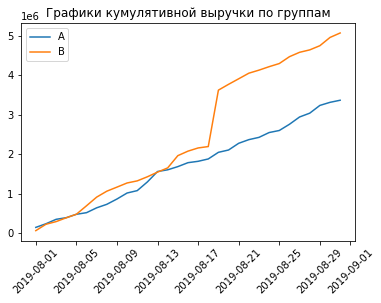

In [18]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 
# cоберём агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
    .agg({
        'date' : 'max', 
        'group' : 'max', 
        'transactionId' : 'nunique', 
        'visitorId' : 'nunique', 
        'revenue' : 'sum'
    }), axis=1).sort_values(by=['date','group'])
# соберём агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({
        'date' : 'max', 
        'group' : 'max', 
        'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
# объединяем кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date','group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('Графики кумулятивной выручки по группам')
plt.xticks(rotation = 45);

В начале теста показатели групп равны. Потом группа В начинает показывать лучшие результаты, а в середине теста происходит резкий скачёк и она вырывается далеко от показателей группы А. Вероятно в это время было совершено какое-то количество дорогих покупкок или всплеск количества заказов именно в этой группе. Стоит избавиться от выбросов и посмотреть на очищенный результат.

## Построим график кумулятивного среднего чека по группам.

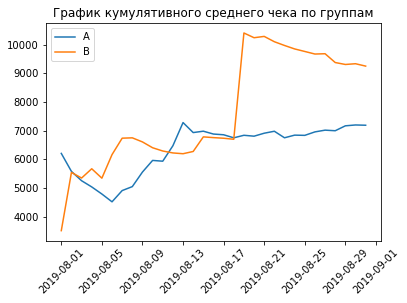

In [19]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('График кумулятивного среднего чека по группам')
plt.xticks(rotation = 45);

Кумулятивное значение среднего чека для группы А сильно колебалось до середины теста, потом выровнялось и даже потихоньку растёт. Для группы В есть сильный скачёк в середине теста и дальнейшее плавное снижение кумулятивного значения среднего чека. Вероятно были дорогие покупки, что привели к такому скачку. Этот график ещё раз подтвердил, что нужно поискать выбросы.

## Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

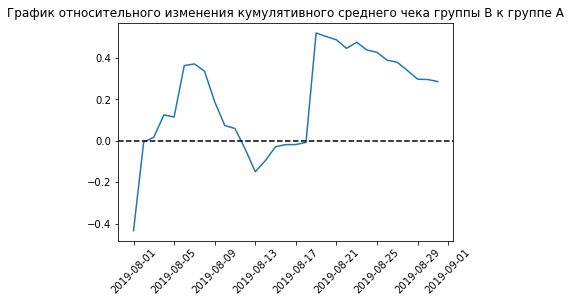

In [20]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')  
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation = 45);

График имеет несколько скачков, что говорит об аномалиях в стоимости или количестве заказов. Нужно их найти.

## Построим график кумулятивной конверсии по группам.

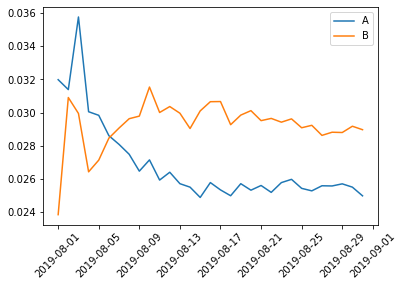

In [21]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation = 45);

В начале теста конверсия колебалась примерно одинаковое время, потом группа В вырвалась вперед немного снизилась и зафиксировалась, а группа А просела и зафиксировалась тоже.  

## Построим график относительного изменения кумулятивной конверсии группы B к группе A.

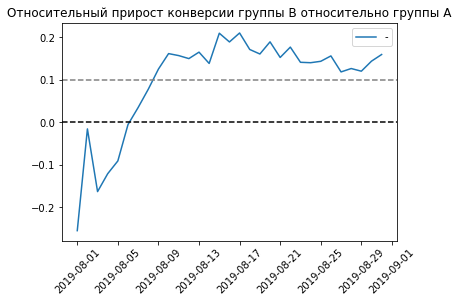

In [22]:
# собираем данные по конверсии в одном датафрейме
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="-")
plt.legend()
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.xticks(rotation = 45);

В самом начале на графике видно колебание, но очень скоро группа В по конверсии обогнала группу А. Затем просела в пределах и выровнялась.

## Построим точечный график количества заказов по пользователям.

In [23]:
# подсчитаем количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


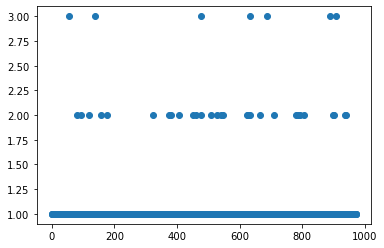

In [24]:
# построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']); 

На графике предположение подтвержается: большинство пользователей совершило одну покупку, меньше - две, а три уже гораздо меньше. 

Большинство пользователей интернет-магазина за месяц совершило 1-2 покупки.

## Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [25]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Не более 1% пользователей оформило больше двух заказов. Исходя из этого можно нижнюю границу выборки взять 2 заказа на одного пользователя, что составит менее 1% данных.

## Построим точечный график стоимостей заказов.

In [28]:
# посмотрим стоимость заказов по пользователям
orders.sort_values(by='revenue', ascending=False)

,transactionId,visitorId,date,revenue,group
506,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1150,666610489,1307669133,2019-08-13,92550,A
803,3668308183,888512513,2019-08-27,86620,B
802,3603576309,4133034833,2019-08-09,67990,A
...,...,...,...,...,...
479,2052514069,1995481842,2019-08-28,70,B
976,3760662696,3577713868,2019-08-27,60,B
815,125335873,3423937755,2019-08-30,50,B
536,863448794,2738601405,2019-08-19,50,B


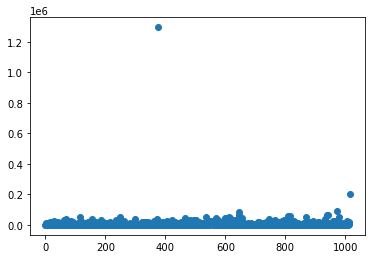

In [29]:
# построим точечную диаграмму стоимости заказов
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

Большая часть заказов пользователей составляет сумму менее 20000, но есть и выдающиеся. Стоит их убрать из выборки, как выброс.

## Посчитайте 95-й и 99-й перцентили стоимости заказов.

In [31]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Посчитав процентили получили ещё более интересные цифры. 95% заказов не превысили 26 785, а заказов дороже 53 904 вообще меньше 1%. Поэтому нижнюю границу по стоимость заказов можно взять по 99 перцентилю.

## Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

In [32]:
# посчитаем заказы и выручку по датам в группе A
ordersADaily = (
    orders[orders['group'] == "A"][['date', 'transactionId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
    
)
# посчитаем заказы и выручку по датам в группе B
ordersBDaily = (
    orders[orders['group'] == "B"][['date', 'transactionId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
    
)
display(ordersADaily.head(), ordersBDaily.head())

,date,transactionId,revenue
0,2019-08-01,23,142779
1,2019-08-02,19,91602
2,2019-08-03,24,112473
3,2019-08-04,11,41176
4,2019-08-05,22,86383


,date,transactionId,revenue
0,2019-08-01,17,59758
1,2019-08-02,23,162043
2,2019-08-03,14,67049
3,2019-08-04,14,96890
4,2019-08-05,21,89908


In [33]:
# для каждого пользователя найдём число заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 
ordersByUsersB.sort_values(by='orders', ascending=False).head()

,userId,orders
347,2742574263,3
33,249864742,3
486,3935952912,2
256,2025197455,2
418,3332057097,2


In [34]:
# разделим на группы пользователей
visitorsA = visitors.query('group == "A"').rename(columns={'visitors': 'visitorsPerDateA'})
visitorsB = visitors.query('group == "B"').rename(columns={'visitors': 'visitorsPerDateB'})  

In [35]:
# добавим пользователей, которые не заказывали
sampleA = (pd.concat([ordersByUsersA['orders'],
                      pd.Series(0, index=np.arange(visitorsA['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
                                name='orders')],axis=0))
sampleB = (pd.concat([ordersByUsersB['orders'],
                      pd.Series(0, index=np.arange(visitorsB['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
                                name='orders')],axis=0)) 

In [36]:
# выведем p-value
print("p-value {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
# прирост конверсии группы В к конверсии группы А
print("Прирост конверсии группы B {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value 0.011
Прирост конверсии группы B 0.160


Сформулируем гипотезы: 

- Нулевая: различий в конверсии между группами нет. 
- Альтернативная: различия в конверсии между группами есть.

Полочив p-value = 0.011, что меньше 0.05, можно отвергнуть нулевую гипотезу. Значит различия в конверсии между группами есть, но будем иметь ввуду, что это "сырые" данные. Относительный прирост конверсии группы В к конверсии группы А составляет 16%. Выше мы видели наличие выбросов, поэтому нужно посчитать метрики после их удаления и сравнить полученные результаты.

## Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [37]:
print('p-value {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Прирост среднего чека группы B {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value 0.829
Прирост среднего чека группы B 0.287


Сформулируем гипотезы:

- Нулевая гипотеза: различий в среднем чеке между группами нет. 
- Альтернативная гипотеза: различия в среднем чеке между группами есть.

P-value = 0.829 - значительно больше 0.05. Повода отвергнуть нулевую гипотезу нет, значит различий в среднем чеке между группами нет. Прирост среднего чека в группе В относительно значения среднего чека группы А составил почти 29%. Анализируя стоимость заказов в группах мы видели несколько очень дорогих, нужно убрать их и снова посчитать метрики, чтобы убедиться в правильности выводов.

## Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

In [38]:
# выберем пользователей с числом заказов больше 99 перцентиля
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], [ 99])[0]]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], [ 99])[0]]['userId'],
    ],
    axis=0,
)
# выберем пользователей с заказами дороже 99 перцентиля
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [99])[0]]['visitorId']

# объединим их
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1114    148427295
33      249864742
58      611059232
989     887908475
803     888512513
dtype: int64
16


In [39]:
print(orders['visitorId'].nunique()) # всего за месяц было покупателей

973


Выбрав нижней границей 99 перцентиль заказов и 99 перцентиль, получили выброс - 16 покупателей, что составило примерно 1.6%. Такая цифра вполне приемлема. 

In [40]:
# сделаем срезы количества заказов по пользователям по группам
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(visitorsA['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
            name='orders')], axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(visitorsB['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
            name='orders')], axis=0) 

In [41]:
# применим статистический критерий Манна-Уитни к полученным выборкам
print('p_value {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Прирост конверсии группы B {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p_value 0.007
Прирост конверсии группы B 0.189


Результаты по конверсии не сильно изменились. p-value на сырых данных был 0.011, на очищенных p_value = 0.007. Можно отвергнуть нулевую гипотезу об отсутствии различий конверсий. Различия в конверсии между группами всё же есть. Пользователи группы В конверсируются лучше, прирост на очищенных данных составил 19% - что на 3% лучше, чем на сырых.

## Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [42]:
print('p_value {0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                    orders[np.logical_and(orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('Прирост среднего чека группы B {0:.3f}'.format(orders[np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()
                / orders[np.logical_and(orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()- 1))

p_value 0.788
Прирост среднего чека группы B -0.032


 P-value стал чуть ниже, всё так же значительно больше 0.05. Повода отвергнуть нулевую гипотезу нет, значит различий в среднем чеке между группами нет. 

Прирост среднего чека в группе В относительно значения среднего чека группы А составил -3%. Если сравнить показатель относительно прироста на сырых данных в +29%, то можно сказать, что все самые дорогие покупки совершили пользователи группы В и это очень сильно повлияло на результаты теста, а без них средний чек группы В ниже среднего чека контрольной группы.

После удаления выбросов, общие результаты теста не поменялись. Статистическая значимость кардинально не изменилась. 

## Построим графики кумулятивной выручки по группам по "очищенным" данным.

In [43]:
abnormalUsers = abnormalUsers.tolist() # создадим список аномальных пользователей

In [44]:
orders = orders[np.logical_not(orders['visitorId'].isin(abnormalUsers))]

In [45]:
len(orders)

986

In [46]:
# cоберём агрегированные кумулятивные по дням данные о заказах без выбросов
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
    .agg({
        'date' : 'max', 
        'group' : 'max', 
        'transactionId' : 'nunique', 
        'visitorId' : 'nunique', 
        'revenue' : 'sum'
    }), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date','group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

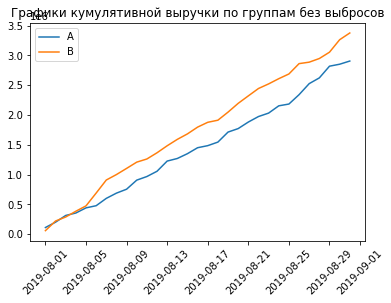

In [47]:
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('Графики кумулятивной выручки по группам без выбросов')
plt.xticks(rotation = 45);

Куммулятивная выручка группы В без выбросов близка к значению группы А, но всё же лучше.

## Построим график кумулятивного среднего чека по группам по "очищенным" данным.

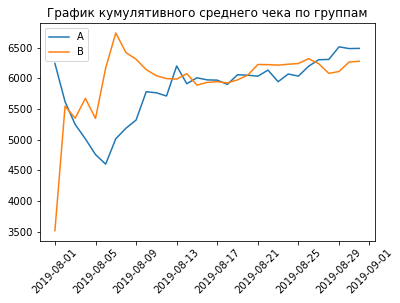

In [48]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('График кумулятивного среднего чека по группам')
plt.xticks(rotation = 45);

На "чистых" данных кумулятивный средний чек группы В в начале теста проигрывал группе А, а затем вырос и сильно приблизился к значению группы А.

## Построим график относительного изменения кумулятивного среднего чека группы B к группе A по "очищенным" данным.

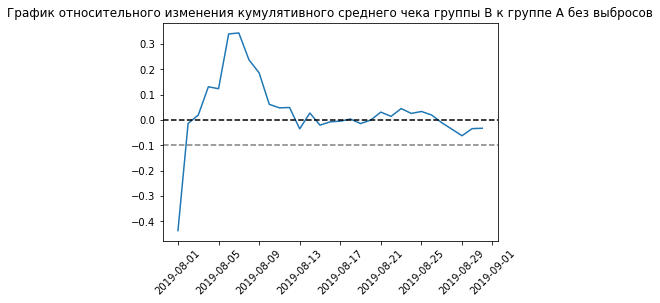

In [49]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков без выбросов
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A без выбросов')
plt.xticks(rotation = 45);

Убрав выбивающиеся значения по сумме и количеству заказов, мы получили совсем другой график относительного изменения кумулятивного среднего чека группы В к группе А. Что подтверждает прирост среднего чека в группе В относительно значения среднего чека группы А -3%, который мы получили в результате применения статистического критерия Манна-Уитни. 

***Вывод***

- Присутствует статистическая значимость различия по конверсии между группами и по «сырым», и по данным после фильтрации аномалий.
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A примрно на 10% и есть незначительная тенденция к улучшению.
- График различия среднего чека, после удаления выбросов, говорит о том, что результаты группы B несколько хуже группы A.
- График кумулятивной выручки по группам и по «сырым», и по данным после фильтрации аномалий показывает лучшие показатели группы В. 

Исходя из выше изложенного, тест следует остановить и признать его успешным. Победила группа В. Конверсия группы В больше, что в итоге даёт увеличение выручки.